In [1]:
#Use of Keras in Data Science

In [2]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow
assert tensorflow.__version__ >= "0.20"

import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.6.0'

In [4]:
tf.__version__

'2.6.0'

In [5]:
# https://keras.io/api/datasets/fashion_mnist/
# https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist/notebook

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,Y_train_full),(X_test,Y_test) = fashion_mnist.load_data()

In [6]:
help(fashion_mnist)

Help on package keras.api._v2.keras.datasets.fashion_mnist in keras.api._v2.keras.datasets:

NAME
    keras.api._v2.keras.datasets.fashion_mnist - Public API for tf.keras.datasets.fashion_mnist namespace.

PACKAGE CONTENTS


FILE
    /usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py




In [7]:
dir(fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [8]:
X_train_full.size

47040000

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
type(X_train_full)

numpy.ndarray

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.,X_train_full[5000:] / 255.
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test/255.

In [13]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [16]:
Y_train[0]

4

In [17]:
Y_train.shape

(55000,)

In [18]:
class_names = ["T-Shirt/top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

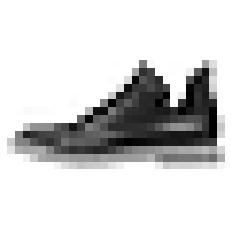

In [19]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[40],cmap="binary")
plt.axis("off")
plt.show()

In [20]:
Y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [21]:
class_names[Y_train[40]]

'Ankle Boot'

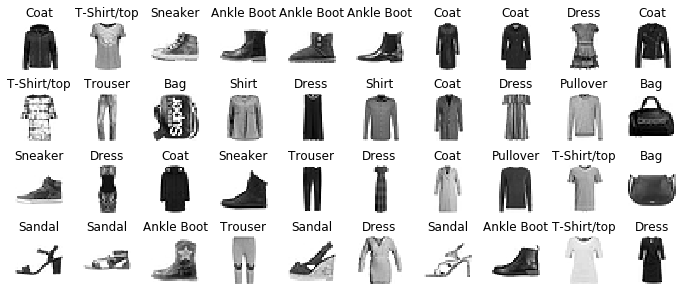

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[Y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))# Add flatten layer
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


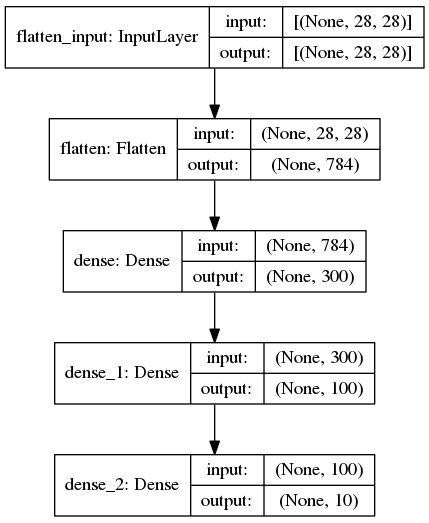

In [26]:
keras.utils.plot_model(model,"my_fashion_mnist_model.png",show_shapes=True)

In [27]:
hidden1=model.layers[1] # first layer
hidden1.name

'dense'

In [28]:
model.get_layer(hidden1.name) is hidden1

True

In [29]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.07125391,  0.00507656, -0.05009282, ..., -0.01041104,
         0.03234036,  0.06626749],
       [ 0.03899749,  0.06151722, -0.0535258 , ...,  0.06996354,
         0.04219775,  0.00112797],
       [-0.04667252, -0.07316057,  0.04408572, ...,  0.07376127,
         0.0138502 , -0.01496133],
       ...,
       [ 0.01434877, -0.03938896,  0.07047047, ..., -0.00046202,
        -0.07405758,  0.04326275],
       [-0.00497016, -0.05124739,  0.00588366, ..., -0.02516677,
        -0.00826392, -0.03708003],
       [ 0.03927535, -0.07268479,  0.02050125, ..., -0.00586609,
         0.01198852, -0.01996914]], dtype=float32)

In [30]:
biases # pretrained bias values, post trained these would change

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
weights.shape

(784, 300)

In [32]:
biases.shape

(300,)

In [33]:
#sgd = keras.optimizers.SGD(learning_rate=0.001)
# Compiling the model we created

model.compile(loss="sparse_categorical_crossentropy",
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              optimizer="sgd",
             metrics=["accuracy"]
             # metrics=[keras.metrics.sparse_categorical_accuracy, ]
             )


In [36]:
history = model.fit(X_train,Y_train, epochs = 30, validation_data=(X_valid,Y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7204 - accuracy: 0.7646 - val_loss: 0.5085 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4893 - accuracy: 0.8298 - val_loss: 0.4416 - val_accuracy: 0.8550
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4444 - accuracy: 0.8453 - val_loss: 0.4665 - val_accuracy: 0.8420
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4167 - accuracy: 0.8537 - val_loss: 0.4056 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8606 - val_loss: 0.4164 - val_accuracy: 0.8536
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3786 - accuracy: 0.8662 - val_loss: 0.3737 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3650 - accuracy: 0.8703 - val_loss: 0.3952 - val_accuracy:

In [42]:
weights, biases = hidden1.get_weights()

In [44]:
weights

array([[ 0.07130663,  0.0050557 , -0.05004582, ..., -0.0103856 ,
         0.03233423,  0.06625704],
       [ 0.03893267,  0.06161232, -0.0534824 , ...,  0.07000695,
         0.0421767 ,  0.00112546],
       [-0.04654103, -0.07426214,  0.04432758, ...,  0.07301047,
         0.01380634, -0.01498192],
       ...,
       [ 0.01221357, -0.04306224,  0.07294855, ...,  0.0094121 ,
        -0.07331627,  0.04401999],
       [-0.00588332, -0.04979718,  0.00803442, ..., -0.01800933,
        -0.00792538, -0.03753275],
       [ 0.03927586, -0.07365282,  0.0212228 , ..., -0.00490606,
         0.01183328, -0.02007147]], dtype=float32)

In [45]:
biases

array([ 9.14440975e-02, -1.32683456e-01,  1.57513559e-01,  1.18258456e-02,
        4.84075285e-02,  1.27460644e-01,  6.41588196e-02, -2.47469936e-02,
        7.06408918e-02,  3.11015788e-02, -5.01894727e-02,  1.91884506e-02,
       -1.12677487e-02,  1.07887350e-01,  8.02922621e-02,  1.81107476e-01,
       -6.01095054e-03,  1.62207559e-02,  3.15786377e-02,  3.86635736e-02,
        8.54108930e-02,  2.23522796e-03,  1.85559809e-01,  3.09976209e-02,
        1.07409276e-01, -2.52258033e-02,  9.26699862e-02,  9.49623212e-02,
        3.75432447e-02, -3.43086221e-03,  4.70033061e-04,  7.62064382e-02,
       -5.95828751e-03,  1.14528008e-01, -1.51407020e-02,  6.50065392e-02,
        1.98372096e-01,  7.90114254e-02,  3.99838276e-02,  8.54392424e-02,
       -2.39909124e-02, -3.78891546e-03, -5.85853821e-03,  1.14111546e-02,
        2.71874834e-02,  3.25317890e-03, -2.26855837e-02, -1.13427088e-01,
       -1.68503784e-02, -7.02359620e-03, -3.82735324e-03,  8.23039263e-02,
        7.62445852e-02,  

In [47]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [49]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

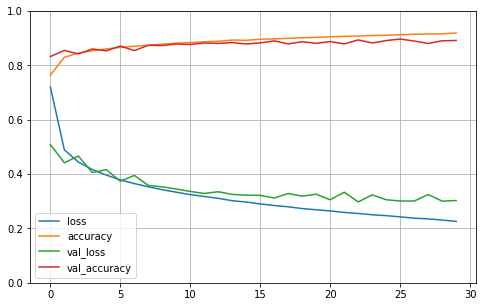

In [53]:
# Plotting the mean training loss and accuracy measured over each epoch
# and the mean validation loss and accuracy measured at the end of each epoch

# val_loss: validation loss

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [55]:
model.evaluate(X_test, Y_test) # Evaluating the model

313/313 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8818


[0.3307545781135559, 0.8817999958992004]

In [57]:
class_names

['T-Shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [68]:
# predicting first 3 elements

X_new = X_test[:3]
y_proba = model.predict(X_new)
# for two decimal points
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.94, 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

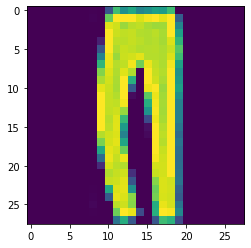

In [69]:
plt.imshow(X_new[2])

In [71]:
np.argmax(y_proba.round(2), axis=1)

array([9, 2, 1])

In [77]:
# predicting the class of these 3 elements

predict_x=model.predict(X_new) 
y_pred=np.argmax(predict_x,axis=1)
y_pred

array([9, 2, 1])

In [78]:
np.array(class_names)[y_pred] # getting the class names of the predicted elements

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [80]:
Y_new = Y_test[:3] # evaluating the prediction by matching with y_test
Y_new

array([9, 2, 1], dtype=uint8)

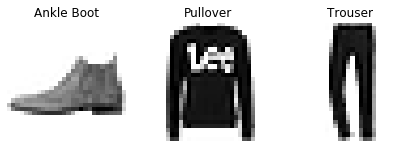

In [82]:
# Plotting the predicted elements

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[Y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()